In [1]:
from numpy import sqrt, pi, exp, diag, linspace, loadtxt, zeros
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
def spherical(x0, D1, D2, K, d):
    k = 1.38e-23
    T = 298
    eta = 0.00125
    x1 = (1+2*K*x0-(1+4*K*x0)**.5)/(2*(K**2)*x0)
    
    M = zeros(len(x1))
    for i in range(3, 101):
        M += i**(2/3)*(K*x1)**(i-1)
    
    D = (x1/x0)*(D1+2*K*x1*D2+((k*T*1e10)/(3*pi*eta*d))*M)
    return D

In [3]:
def plot(x0, D_obs, *args):
    fig  = plt.figure()
    axes = fig.add_subplot(1,1,1)
    axes.plot(x0, D_obs, 'o', linewidth=3, color='#90CAF9', label='D (observed)')
    axes.plot(x0, spherical(x0, args[0], args[1], args[2], args[3]), linewidth=2, color='#BA68C8', label='D (spherical model)')
    axes.plot(x0, spherical(x0, args[4], args[5], args[6], args[7]), linewidth=2, color='green', label='suppl. calc')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.xaxis.set_ticks_position('bottom')
    axes.yaxis.set_ticks_position('left')
    axes.set_xlabel('Concentration')
    axes.set_ylabel('D')
    axes.legend()
    axes.grid(alpha=.5)
    plt.show()

In [4]:
def show_params(D1, D2, K, d):
    table_data = {
        'D1'   : D1,
        'D2'   : D2,
        'D1/D2': D1/D2,
        'K'    : K,
        'd'    : d
    }
    props_table = DataFrame(
        table_data,
        index=[0],
        columns=['D1', 'D2', 'D1/D2', 'K', 'd']
    )
    return props_table.style

[ 0.842  0.744  0.848  0.902  0.932  1.024  1.188  1.338  1.507  1.671]
[  9.39386450e-01   1.78277673e+01   1.94029937e+01   3.73678562e-10]


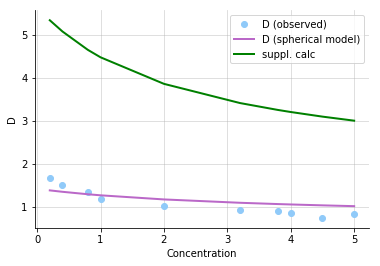

In [5]:
aik_data = loadtxt('data_files\\aik.dat')
x0 = aik_data[:,0]
D_obs = aik_data[:,1]*1e10

bv, cov = curve_fit(
        spherical, x0, D_obs,
        p0=[1.4, 1.2, .4,3e-9],
        loss='soft_l1',
        bounds=([1,1,.35,3e-11], [2,2,.5,3e-9]))

print(D_obs)
perr = sqrt(diag(cov))
print(perr)
plot(x0, D_obs, bv[0], bv[1], bv[2], bv[3], 5.628452875, 4.453836181, 0.591342644, 1.287e-9)
show_params(bv[0], bv[1], bv[2], bv[3])

[ 5.8665   5.904    5.959    6.0405   6.1495   6.11625  6.1195   6.22625
  6.2075   6.33325  6.3885   6.5015   6.54175  6.691  ]


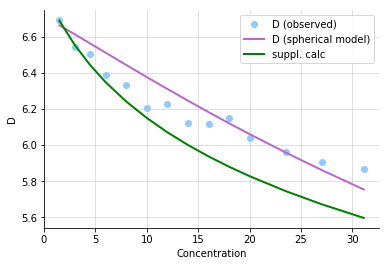

In [6]:
caf_data = loadtxt('data_files\\caf.dat')
x0 = caf_data[:,0]
D_obs = caf_data[:,1]*1e10

bv, cov = curve_fit(
        spherical, x0, D_obs,
        p0=[7, 5.5, 1.15e-2,8e-10],
        loss='soft_l1',
        bounds=([6,5,1e-2,3e-10], [8,6,1.3e-2,3e-9]))

print(D_obs)
plot(x0, D_obs, bv[0], bv[1], bv[2], bv[3], 6.85995022, 5.295135494, 0.041781352, 0.469e-9)
show_params(bv[0], bv[1], bv[2], bv[3])

[ 3.1205   3.2855   3.3605   3.53125  3.704    3.8445   4.0855   4.216
  4.374    4.528    4.7935   4.99     5.392    5.62125]


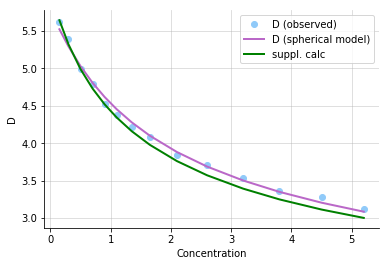

In [7]:
pf_data = loadtxt('data_files\\pf.dat')
x0 = pf_data[:,0]
D_obs = pf_data[:,1]*1e10

bv, cov = curve_fit(
        spherical, x0, D_obs,
        p0=[5, 5, .6,1e-9],
        loss='soft_l1',
        bounds=([3,3,.4,3e-11], [7,7,.8,3e-9]))

print(D_obs)
plot(x0, D_obs, bv[0], bv[1], bv[2], bv[3], 6.065380531, 2.702376484, 0.483843874, 1.1e-9)
show_params(bv[0], bv[1], bv[2], bv[3])

[ 3.74285714  3.82057143  3.917       4.02714286  4.092       4.19514286
  4.25        4.33285714  4.38671429  4.44214286  4.56685714  4.5875      4.8
  4.83216667  4.88183333]


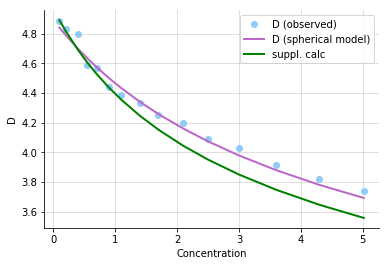

In [8]:
eb_data = loadtxt('data_files\\eb.dat')
x0 = eb_data[:,0]
D_obs = eb_data[:,1]*1e10

bv, cov = curve_fit(
        spherical, x0, D_obs,
        p0=[4.8, 4, .3,1e-9],
        loss='soft_l1',
        bounds=([4,3,.2,3e-11], [6,5,.4,3e-9]))

print(D_obs)
plot(x0, D_obs, bv[0], bv[1], bv[2], bv[3], 4.96722617, 4.024847726, .426756552, .805e-9)
show_params(bv[0], bv[1], bv[2], bv[3])

[ 4.117  3.994  3.432  2.738  2.054  2.317  1.778  1.671  1.646  1.778
  1.673  1.582  1.481  1.308]


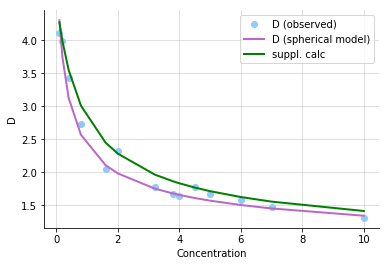

In [9]:
nb_data = loadtxt('data_files\\nb.dat')
x0 = nb_data[:,0]
D_obs = nb_data[:,1]*1e10

bv, cov = curve_fit(
        spherical, x0, D_obs,
        p0=[4.7, 3.5, 6,1e-9],
        loss='soft_l1',
        bounds=([4,3,5.5,3e-11], [7, 5, 6, 3e-9]))

print(D_obs)
plot(x0, D_obs, bv[0], bv[1], bv[2], bv[3], 4.641945104, .406717889, .494400683, 1.924e-9)
show_params(bv[0], bv[1], bv[2], bv[3])